In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
258013,258013,23593,155980,How do you log in to Facebook if you forgot yo...,How am I supposed to get back into my Facebook...,1
402557,402557,536044,536045,"General: What is the Meaning of ""Do you have a...",Why do people consider Mark Twain the mirror o...,0
13454,13454,25837,25838,What does T-Mobile mean by unlimited data?,Is it possible to pay for unlimited data on a ...,0
74536,74536,127720,72606,Where is the most beautiful beach in the world?,Which is the most beautiful beach in the world...,1
123999,123999,6803,47793,How can I stop masturbating forever?,How can I stop masturbating?,1
110292,110292,180865,180866,What are the most important papers published i...,What are the most important papers published i...,0
67431,67431,83301,116692,Should the Indian education system be revamped?,Do you think the Indian educational system sho...,1
222479,222479,202825,330047,"What music video, pre-1993, would you most wan...",What are you going to say about this video? Is...,0
320602,320602,446173,446174,What are some books for learning python?,What are the books to learn python PDF.?,0
336743,336743,394129,127894,How do I make easy money?,Which is the best way to earn easy money?,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


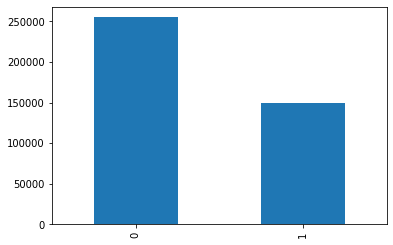

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


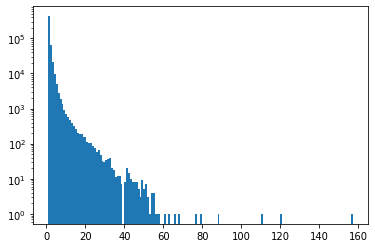

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()